# Assignment 4 Project for Course BAN6420 (Programming in Python and R)

"""
Task 0 : Data Preparation - Unzip the dataset using appropriate functions and rename it to "Netflix_shows_movies."
Task 1 : Data Cleaning - Address missing values in the dataset.
Task 2 : Data Exploration - Perform various data exploration tasks, including describing the data and conducting statistical analysis.
Task 3 : Data Visualization - Create visualizations to represent the following
                                - Most watched genres.
                                - Ratings distribution.

"""

In [2]:
# Import the needed packages
import os
import pandas as pd
import zipfile as zip
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation and Integration ...

In [3]:
# Task 0 : Data Preparation

try:

    # Unzip the dataset from the zip archive
    with zip.ZipFile("netflix_data.zip", mode="r") as zipper:
        zipper.extract(member="netflix_data.csv")

    # Rename the file name    
    os.rename(src="netflix_data.csv", dst="Netflix_shows_movies.csv")

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)


# Dataset Import and Cleaning ...

In [179]:
# Task 1 : Data Cleaning

try:

    # Import the dataset into pandas
    df = pd.read_csv(filepath_or_buffer="Netflix_shows_movies.csv")

    # Remove every row that has missing values "NA" in "any" of its column
    df = df.dropna(axis="index", how="any", inplace=False)

    # To rename "listed_in" as "genres"
    df = df.rename(columns={"listed_in" : "genres"})

    # Data transformation to change the format of "date_added" column to proper date column
    df.loc[:, "date_added"] = pd.to_datetime(df["date_added"], format="mixed", dayfirst=True).dt.date

    # Save a copy of the clean data
    df.to_csv("Clean_Data_Set.csv", index=False)


# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)


# Data Exploration Begins ...

In [ ]:
# Task 2 : Data Exploration

# To show summary of columns and datatypes
df.info(verbose=True)

In [ ]:
# Task 2 : Data Exploration

# To view the first 10 rows of the dataset
df.head(n=10)

In [125]:
# Task 2 : Data Exploration

# To get a summary statistics of the dataset (Describing only the object type)
df.describe(include=["object"])

,type,title,director,cast,country,date_added,rating,duration,genres,description
count,3774,3774,3774,3774,3774,3774,3774,3774,3774,3774
unique,2,3752,2920,3667,433,989,14,184,296,3766
top,Movie,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,2020-01-01,TV-MA,90 min,"Dramas, International Movies",A surly septuagenarian gets another chance at ...
freq,3678,3,18,10,1323,105,1189,93,237,3


In [129]:
# Statistical Analysis
##### The dataset values are categorical and as such only the Mode - (Highiest number of occurance) will be calculated ######

mode_for_genres = df['genres'].mode()
mode_for_title = df['title'].mode()

print(str(mode_for_genres))


0    Dramas, International Movies
Name: genres, dtype: object


# Data Visualization Begins ...
# Task 3 : Data Visualization - Create visualizations to represent the following

In [104]:
# Task 3A - Most watched genres visualization with Bar Chart

try:

    # Filter the genre column from the master list
    genre_filter = df[["genres"]]

    # Do a count of the genere_types 
    genre_count = genre_filter.value_counts()

    # Create a pandas dataframe of the genere_types and count
    genre_dataset = pd.DataFrame(genre_count).rename(columns={"count" : "count_of_genre"}).reset_index()

    # Select the first 10 records as the "Most watched genres"
    genre_first_ten = genre_dataset.head(10)

    # Form two list of genere_types and count_of_genre
    genere_types = genre_first_ten["genres"].to_list()
    count_of_genre = genre_first_ten["count_of_genre"].to_list()


# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)



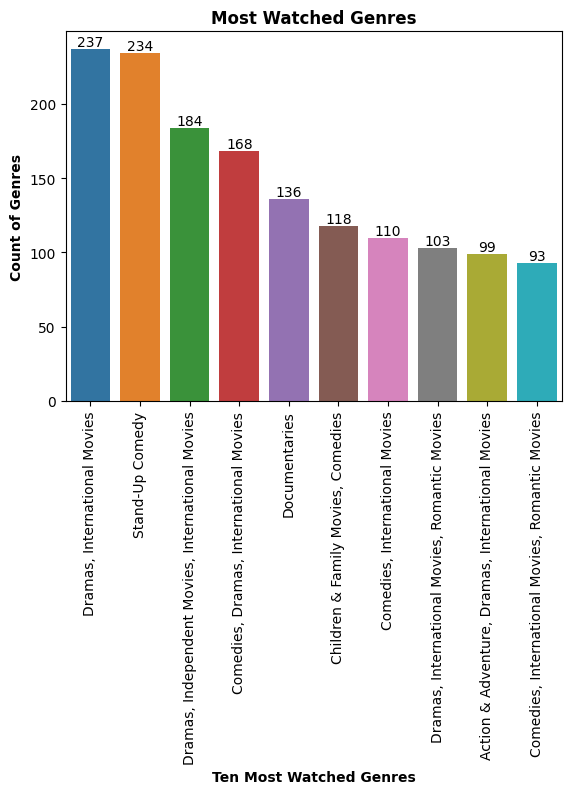

In [186]:
# Plotting of the Bar Chart using Seaborn

try:
    
    # Plot the graph on X and Y axis
    bar_plot = sns.barplot(data=genre_first_ten, x=genere_types, y=count_of_genre, hue="genres")

    # Add data label on the bar of the graph based on count_of_genre
    _ = [bar_plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10, color='black') for p in bar_plot.patches]

    # Make data label display on a 90 degrees
    plt.xticks(rotation=90)

    # Adding titles and labels
    plt.title("Most Watched Genres", fontweight='bold')
    plt.xlabel("Ten Most Watched Genres", fontweight='bold')
    plt.ylabel("Count of Genres", fontweight='bold')

    # Save the graph
    plt.savefig("Python_genre_most_watched.png")

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)



In [176]:
# Task 3B - Ratings distribution visualizating using Histogram

try:

    # Filter the rating column from the master list
    rating_filter = df["rating"]

    # Do a count of the rating_types 
    rating_count = rating_filter.value_counts()

    # Create a pandas dataframe of the rating_types and count
    rating_dataset = pd.DataFrame(rating_count).rename(columns={"count" : "count_of_rating"}).reset_index()

    # To Print the Rating Distribution
    rating_dataset

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)


,rating,count_of_rating
0,TV-MA,1189
1,TV-14,917
2,R,501
3,TV-PG,358
4,PG-13,278
5,PG,176
6,NR,175
7,TV-G,54
8,TV-Y7,48
9,G,35


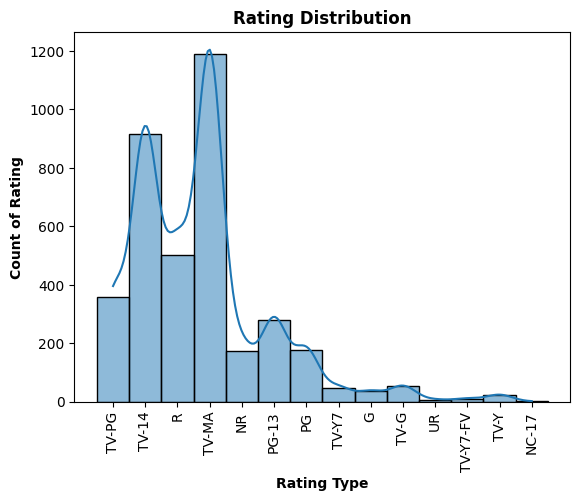

In [187]:
# Plotting of the Bar Chart using Seaborn
try:

    # Plot the graph on X and Y axis
    sns.histplot(data=rating_filter, kde=True, )

    # Make data label display on a 90 degrees
    plt.xticks(rotation=90)

    # Adding titles and labels
    plt.title("Rating Distribution", fontweight='bold')
    plt.xlabel("Rating Type", fontweight='bold')
    plt.ylabel("Count of Rating", fontweight='bold')

    # Save the graph
    plt.savefig("Python_Rating_Distribution.png")

# Error Handling for Exception (Task 4)
except Exception as e:
    error_message = {"message":str(e)}
    print(error_message)
